import the dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


data collection and processing

In [ ]:
# load the data
loan_dataset = pd.read_csv("/content/drive/MyDrive/self_projects/loan_status/train_u6lujuX_CVtuZ9i (1).csv")
loan_dataset.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [ ]:
loan_dataset.shape

(614, 13)

In [ ]:
loan_dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_dataset.describe() # removed those columns which are categorical

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [ ]:
loan_dataset.dropna(inplace=True)

In [ ]:
loan_dataset.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       480.000000         480.000000  480.000000        480.000000   
mean       5364.231250        1581.093583  144.735417        342.050000   
std        5668.251251        2617.692267   80.508164         65.212401   
min         150.000000           0.000000    9.000000         36.000000   
25%        2898.750000           0.000000  100.000000        360.000000   
50%        3859.000000        1084.500000  128.000000        360.000000   
75%        5852.500000        2253.250000  170.000000        360.000000   
max       81000.000000       33837.000000  600.000000        480.000000   

       Credit_History  
count      480.000000  
mean         0.854167  
std          0.353307  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

encode the labelled data

In [ ]:
loan_dataset["Loan_Status"].value_counts()

Loan_Status
Y    332
N    148
Name: count, dtype: int64

In [ ]:
loan_dataset.replace({"Loan_Status":{"Y":1, "N":0}}, inplace=True)

In [ ]:
loan_dataset.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History Property_Area  Loan_Status  
1             1.0         Rural            0  
2             1.0         Urban            1  
3             1.0         Urban            1  
4             1.0         Urban            1  
5             1.0         Urban            1

data visualization

<Axes: xlabel='Education', ylabel='count'>

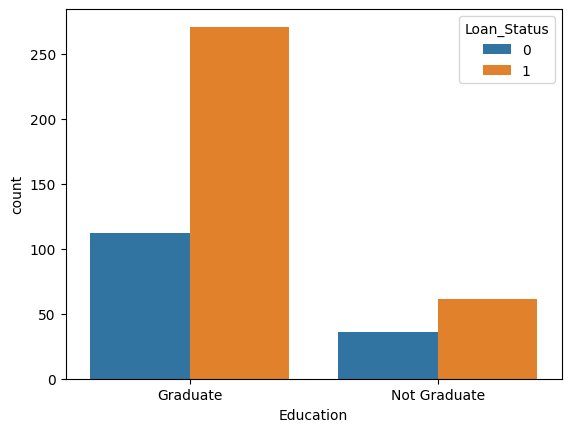

In [ ]:
sns.countplot(x = "Education", hue = "Loan_Status", data = loan_dataset)

<Axes: xlabel='Gender', ylabel='count'>

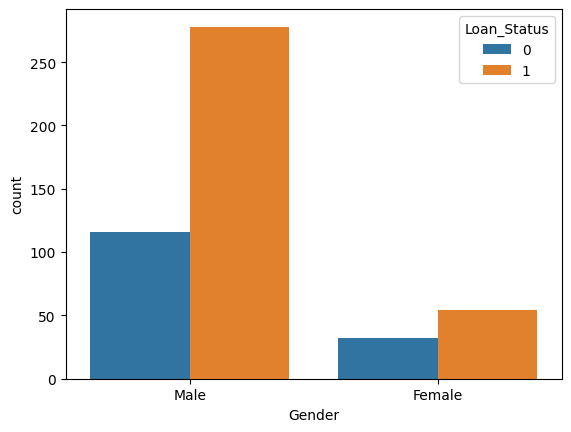

In [ ]:
sns.countplot(x = "Gender", hue = "Loan_Status", data = loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

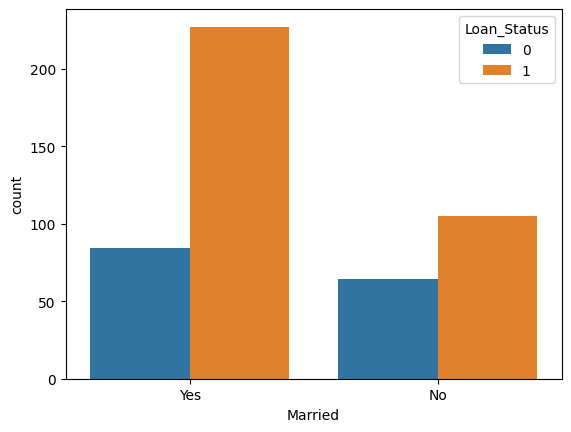

In [ ]:
sns.countplot(x = "Married", hue = "Loan_Status", data = loan_dataset)

<Axes: xlabel='Self_Employed', ylabel='count'>

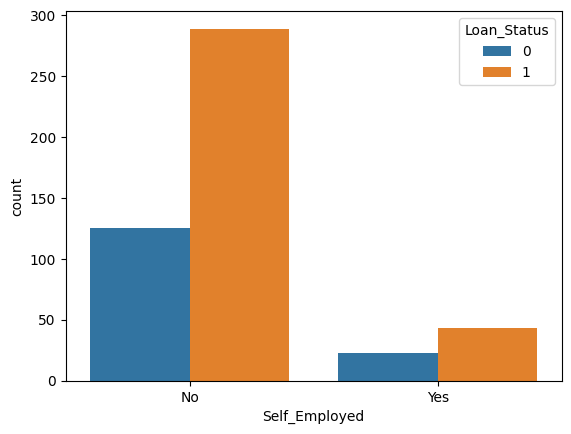

In [ ]:
sns.countplot(x = "Self_Employed", hue = "Loan_Status", data = loan_dataset)

<Axes: xlabel='Property_Area', ylabel='count'>

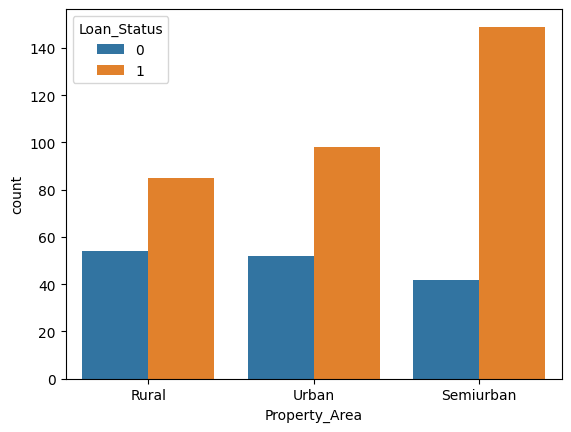

In [ ]:
sns.countplot(x = "Property_Area", hue = "Loan_Status", data = loan_dataset)

In [ ]:
print(loan_dataset["Gender"].value_counts())
print(loan_dataset["Married"].value_counts())
print(loan_dataset["Education"].value_counts())
print(loan_dataset["Self_Employed"].value_counts())
print(loan_dataset["Property_Area"].value_counts())

Gender
Male      394
Female     86
Name: count, dtype: int64
Married
Yes    311
No     169
Name: count, dtype: int64
Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64
Self_Employed
No     414
Yes     66
Name: count, dtype: int64
Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64


encoding other categorical variables

In [ ]:
loan_dataset.replace({"Gender":{"Male": 1, "Female": 0}, "Married":{"Yes": 1, "No": 0}, "Education":{"Graduate": 1, "Not Graduate": 0}, "Self_Employed":{"Yes": 1, "No": 0}, "Property_Area":{"Rural": 0, "Semiurban": 1, "Urban": 2}}, inplace=True)

In [ ]:
loan_dataset.head()

Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
1  LP001003       1        1          1          1              0   
2  LP001005       1        1          0          1              1   
3  LP001006       1        1          0          0              0   
4  LP001008       1        0          0          1              0   
5  LP001011       1        1          2          1              1   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History  Property_Area  Loan_Status  
1             1.0              0            0  
2             1.0              2            1  
3             1.0              2            1  
4             1.0              2            1  
5             1.0              2            1

In [ ]:
loan_dataset[loan_dataset["Dependents"] == "3+"] = 3

In [ ]:
loan_dataset["Dependents"].value_counts()

Dependents
0    274
2     85
1     80
3     41
Name: count, dtype: int64

Splitting the data

In [ ]:
X = loan_dataset.drop(columns = ["Loan_ID", "Loan_Status"])

In [ ]:
y = loan_dataset.iloc[:,-1]

train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

training the model:

Support Vector Machine Classifier

In [ ]:
clf = svm.SVC(kernel = "linear")

In [ ]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

accuracy score

In [ ]:
# prediction over training data
train_pred = clf.predict(X_train)
train_accuracy_score = accuracy_score(y_train, train_pred)

In [ ]:
# prediction over testing data
test_pred = clf.predict(X_test)
test_accuracy_score = accuracy_score(y_test, test_pred)

prediction system

In [162]:
X_new = np.asarray(X_test.iloc[0])
X_new = X_new.reshape(1,-1)
test_prediction = clf.predict(X_new)
print(test_prediction[0])

if test_prediction[0] == 1:
  print("Loan is approved")
else:
  print("Loan is rejected")

1
Loan is approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
